In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np

In [36]:
dataset = tf.keras.datasets.cifar10

In [37]:
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [38]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog","horse", "ship", "truck"]
labels_dict = {i:name for i, name in enumerate(labels)}

In [39]:
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [40]:
x_train.shape

(50000, 32, 32, 3)

In [41]:
x_test.shape

(10000, 32, 32, 3)

In [42]:
x_train, x_test = x_train/255, x_test/255

In [43]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation="relu"),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Conv2D(64, (2,2)),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation="sigmoid")
])

In [44]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.01)

In [45]:
model.compile(optimizer=sgd, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [46]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=2000, epochs=10)

Epoch 1/10
25/25 [==============================] - 49s 2s/step - loss: 2.3164 - accuracy: 0.0961 - val_loss: 2.3010 - val_accuracy: 0.1018
Epoch 2/10
25/25 [==============================] - 50s 2s/step - loss: 2.3007 - accuracy: 0.1063 - val_loss: 2.2930 - val_accuracy: 0.1335
Epoch 3/10
25/25 [==============================] - 48s 2s/step - loss: 2.2947 - accuracy: 0.1148 - val_loss: 2.2878 - val_accuracy: 0.1410
Epoch 4/10
25/25 [==============================] - 46s 2s/step - loss: 2.2894 - accuracy: 0.1212 - val_loss: 2.2822 - val_accuracy: 0.1470
Epoch 5/10
25/25 [==============================] - 48s 2s/step - loss: 2.2854 - accuracy: 0.1258 - val_loss: 2.2768 - val_accuracy: 0.1570
Epoch 6/10
25/25 [==============================] - 48s 2s/step - loss: 2.2801 - accuracy: 0.1338 - val_loss: 2.2712 - val_accuracy: 0.1656
Epoch 7/10
25/25 [==============================] - 47s 2s/step - loss: 2.2753 - accuracy: 0.1400 - val_loss: 2.2649 - val_accuracy: 0.1715
Epoch 8/10
25/25 [==

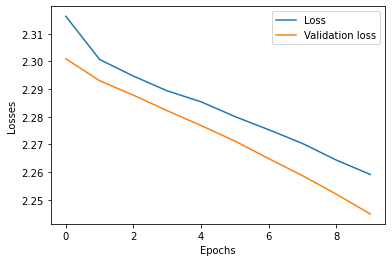

In [47]:
#Loss
plt.figure()
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()

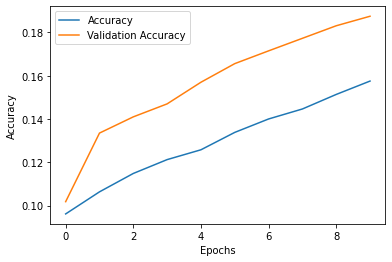

In [48]:
#Accuracy
plt.figure()
plt.plot(history.history["accuracy"], label="Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
#Prediction
test = random.randint(1,10000)
test = x_test[:1]

In [50]:
test.shape

(1, 32, 32, 3)

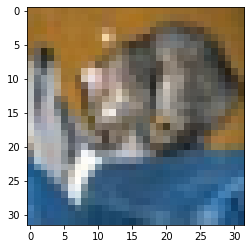

In [51]:
plt.imshow(test[0])

In [52]:
test.shape

(1, 32, 32, 3)

In [53]:
pred = model.predict(test)

1/1 [==============================] - 0s 79ms/step


In [54]:
pred = np.argmax(pred).astype("int32")

In [55]:
labels_dict[pred]

'cat'